Question 1

In [27]:
import pandas as pd
import numpy as np


In [200]:

# Step - 2 & 3: Data import and storage
url = r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, delimiter='|')
print(users)


     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


In [30]:

# Step - 4: Discover what is the mean age per occupation
mean_age_by_occupation = users.groupby('occupation')['age'].mean()
print("Mean age per occupation:\n", mean_age_by_occupation, "\n")


Mean age per occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64 



In [31]:

# Step - 5: Discover the Male ratio per occupation and sort it from the most to the least
male_ratio = users.groupby('occupation')['gender'].value_counts(normalize=True).loc[:, 'M'].sort_values(ascending=False)
print("Male ratio per occupation:\n", male_ratio, "\n")


Male ratio per occupation:
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64 



In [32]:


# Step - 6: For each occupation, calculate the minimum and maximum ages
min_max_ages_by_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print("Minimum and Maximum ages per occupation:\n", min_max_ages_by_occupation, "\n")


Minimum and Maximum ages per occupation:
                min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60 



In [33]:

# Step - 7: For each combination of occupation and sex, calculate the mean age
mean_age_by_occupation_gender = users.groupby(['occupation', 'gender'])['age'].mean()
print("Mean age per occupation and gender:\n", mean_age_by_occupation_gender, "\n")


Mean age per occupation and gender:
 occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028

In [35]:

# Step - 8: For each occupation present the percentage of women and men
gemale_users = users[users.gender=='M'].groupby(['occupation'])['gender'].agg('count')
female_users = users[users.gender=='F'].groupby(['occupation'])['gender'].agg('count')
total_users = users.groupby(['occupation'])['user_id'].agg('count')

gender_stats = pd.concat([male_users, female_users, total_users], axis=1)
gender_stats.columns = ['male_users', 'female_users', 'total_users']
gender_stats.fillna(0, inplace=True)

gender_stats['percent_of_women'] = gender_stats["female_users"]*100/gender_stats["total_users"]
gender_stats['percent_of_men'] = gender_stats["male_users"]*100/gender_stats["total_users"]
gender_stats[['percent_of_women', 'percent_of_men']]


,percent_of_women,percent_of_men
occupation,,
administrator,45.569620,54.430380
artist,46.428571,53.571429
doctor,0.000000,100.000000
educator,27.368421,72.631579
engineer,2.985075,97.014925
entertainment,11.111111,88.888889
executive,9.375000,90.625000
healthcare,68.750000,31.250000
homemaker,85.714286,14.285714


Question 2

In [38]:

# Step - 1: Importing the necessary libraries
import pandas as pd
import numpy as np


In [39]:
# Steps - 2 & 3: Data import and storage
url = r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url, delimiter=',')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [40]:
# Steps - 4: Selecting only the Goal column
euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [41]:
# Steps - 5: How many teams participated in Euro2012?
num_teams_participated = euro12['Team'].nunique()
print("Number of teams participated in Euro2012:", num_teams_participated)


Number of teams participated in Euro2012: 16


In [42]:
# Step 6: What is the number of columns in the dataset?
num_columns = len(euro12.columns)
print("Number of columns in the dataset:", num_columns)


Number of columns in the dataset: 35


In [43]:
# Step 7: View only the columns Team, Yellow Cards, and Red Cards
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)


                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [44]:
# Step 8: Sort the teams by Red Cards, then by Yellow Cards
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'])
print("Top 20 teams after sorting by Red Cards and Yellow Cards:\n", discipline_sorted.head(20))


Top 20 teams after sorting by Red Cards and Yellow Cards:
                    Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany             4          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
4                France             6          0
12               Russia             6          0
1        Czech Republic             7          0
14               Sweden             7          0
0               Croatia             9          0
13                Spain            11          0
10             Portugal            12          0
7                 Italy            16          0
11  Republic of Ireland             6          1
9                Poland             7          1
6                Greece             9          1


In [45]:
# Step 9: Calculate the mean Yellow Cards given per Team
mean_yellow_cards_per_team = discipline.groupby('Team')['Yellow Cards'].mean()
print("Mean Yellow Cards given per Team:\n", mean_yellow_cards_per_team)


Mean Yellow Cards given per Team:
 Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64


In [46]:
# Step 10. Filter teams that scored more than 6 goals
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [47]:
# Step 11: Select the teams that start with G
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]
print("Teams that start with G:\n", teams_starting_with_G)


Teams that start with G:
       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 

In [48]:
# Step 12: Select the first 7 columns
first_seven_columns = euro12.iloc[:, :7]
print("Subset of the first 7 columns:\n", first_seven_columns)


Subset of the first 7 columns:
                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13

In [49]:
# Step 13. Select all columns except the last 3
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [50]:
# Step 14: Present only the Shooting Accuracy from England, Italy, and Russia
selected_teams_shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print("Shooting Accuracy from England, Italy, and Russia:\n", selected_teams_shooting_accuracy)



Shooting Accuracy from England, Italy, and Russia:
        Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


Question 3:

In [51]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [52]:
# Step 2: Create 3 different Series, each of length 100
np.random.seed(17)

s1 = pd.Series(np.random.randint(1, 5, size=100))
s2 = pd.Series(np.random.randint(1, 4, size=100))
s3 = pd.Series(np.random.randint(10000, 30001, size=100))

print("Series 1:\n", s1.head())
print("Series 2:\n", s2.head())
print("Series 3:\n", s3.head())


Series 1:
 0    4
1    2
2    4
3    3
4    3
dtype: int32
Series 2:
 0    2
1    2
2    2
3    3
4    2
dtype: int32
Series 3:
 0    21778
1    17272
2    14847
3    26136
4    18214
dtype: int32


In [53]:
# Step 3: Create a DataFrame by joining the Series by column
df = pd.concat([s1, s2, s3], axis=1)
print("DataFrame created by joining the Series by column:\n", df.head())


DataFrame created by joining the Series by column:
    0  1      2
0  4  2  21778
1  2  2  17272
2  4  2  14847
3  3  3  26136
4  3  2  18214


In [54]:
# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df.head()

,bedrs,bathrs,price_sqr_meter
0,4,2,21778
1,2,2,17272
2,4,2,14847
3,3,3,26136
4,3,2,18214


In [55]:
# Step 5: Create a one-column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn_df = pd.DataFrame(pd.concat([s1, s2, s3], axis=0), columns=['bigcolumn'])
print("One-column DataFrame 'bigcolumn_df':\n", bigcolumn_df.head())


One-column DataFrame 'bigcolumn_df':
    bigcolumn
0          4
1          2
2          4
3          3
4          3


In [59]:
# Step 6. Ops it seems it is going only until index 99. Is it true?
bigcolumn_df.tail()

,bigcolumn
95,29943
96,29427
97,17636
98,28966
99,25790


In [60]:
len(bigcolumn_df)

300

In [62]:
# Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn_df.reset_index(inplace=True, drop=True)
bigcolumn_df.tail()

,bigcolumn
295,29943
296,29427
297,17636
298,28966
299,25790


QUESTION 4


In [113]:
# Step 1: Import the necessary libraries
# Step 2: Import the dataset from the attached file wind.txt

import pandas as pd
import numpy as np
import datetime


In [125]:
pd.read_csv('wind.txt', sep=' ')

,Yr,Mo,Dy,Unnamed: 3,Unnamed: 4,RPT,Unnamed: 6,Unnamed: 7,VAL,Unnamed: 9,...,MUL,Unnamed: 30,Unnamed: 31,CLO,Unnamed: 33,Unnamed: 34,BEL,Unnamed: 36,Unnamed: 37,MAL
0,61,NaN,1.0,NaN,1.00,15.04,14.96,13.17,NaN,9.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,61,NaN,1.0,NaN,2.00,14.71,NaN,NaN,NaN,10.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61,NaN,1.0,NaN,3.00,18.50,16.88,12.33,10.13,11.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61,NaN,1.0,NaN,4.00,10.58,NaN,6.63,11.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61,NaN,1.0,NaN,5.00,13.33,13.25,11.42,NaN,6.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12.0,27.0,17.58,16.96,17.62,NaN,8.08,13.21,11.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6570,78,12.0,28.0,13.21,NaN,5.46,13.46,NaN,5.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6571,78,12.0,29.0,14.00,10.29,14.42,NaN,8.71,NaN,9.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6572,78,12.0,30.0,18.50,14.04,21.29,NaN,9.13,12.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:

# Step 3: Assign it to a variable called data and replace the first 3 columns by a proper
#         datetime index
with open('wind.txt', 'r') as file:
    lines = file.readlines()

wind_data_raw = pd.DataFrame([line.split() for line in lines[1:]], columns=lines[0].split())
wind_data_cleaned = wind_data_raw.replace('NaN', np.NaN)
wind_data_numeric = wind_data_cleaned.astype(float)

wind_data_numeric.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61.0,1.0,1.0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61.0,1.0,2.0,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61.0,1.0,3.0,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61.0,1.0,4.0,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61.0,1.0,5.0,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [91]:

# Step 4: Year 2061? Do we really have data from this year? Create a function to fix it
#         and apply it
# Define a function to fix the year

def fix_year(dt):
    if dt.year > 2000:
        dt = dt.replace(year=dt.year - 100)
    return dt

# Applying the function to the index
wind_data.index = data.index.map(fix_year)

# Printing the updated DataFrame
print(data)



              RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA    MUL  \
date                                                                        
1961-01-01  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25  10.83   
1961-01-02  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   9.79   
1961-01-03  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   8.50   
1961-01-04  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   5.83   
1961-01-05  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54  10.92   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
1978-12-27  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59  14.04   
1978-12-28  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25  15.25   
1978-12-29  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46  14.50   
1978-12-30  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87  12.46   
1978-12-31  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63  11.58   

In [124]:

# Step 5: Set the right dates as the index. Pay attention to the data type; it should be
#         datetime64[ns].
# Convert the date columns to datetime
wind_data.index = pd.to_datetime(data.index)
print(data.index)


DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='date', length=6574, freq=None)


In [126]:

# Step 6: Compute how many values are missing for each location over the entire
#         record. They should be ignored in all calculations below

missing_values = wind_data_numeric.isnull().sum()
print(missing_values)


year     0
month    0
day      0
RPT      6
VAL      3
ROS      2
KIL      5
SHA      2
BIR      0
DUB      3
CLA      2
MUL      3
CLO      1
BEL      0
MAL      4
dtype: int64


In [128]:

# Step 7: Compute how many non-missing values there are in total.

data.notna().sum().sum()


78857

In [130]:

# Step 8: Calculate the mean windspeeds of the windspeeds over all the locations and
#         all the times. A single number for the entire dataset.

mean_windspeed = data.mean().mean()
print(mean_windspeed)


10.227982360836938


In [135]:

# Step 9: Create a DataFrame called loc_stats and calculate the min, max, and mean
#         windspeeds and standard deviations of the windspeeds at each location over all the
#         days. A different set of numbers for each location.

loc_stats = data.describe(percentiles=[]).T[['min', 'max', 'mean', 'std']]
print(loc_stats)


      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794


In [134]:

# Step 10: Create a DataFrame called day_stats and calculate the min, max, mean, and
#          standard deviations of the windspeeds across all the locations at each
#          day. A different set of numbers for each day.

day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)
print(day_stats)


             min    max       mean       std
date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356
...          ...    ...        ...       ...
1978-12-27  8.08  40.08  16.708333  7.868076
1978-12-28  5.00  41.46  15.150000  9.687857
1978-12-29  8.71  29.58  14.890000  5.756836
1978-12-30  9.13  28.79  15.367500  5.540437
1978-12-31  9.59  27.29  15.402500  5.702483

[6574 rows x 4 columns]


In [137]:

# Step 11: Find the average windspeed in January for each location.
#          Treat January 1961 and January 1962 both as January.

avg_windspeed_january = data[data.index.month == 1].mean()
print(avg_windspeed_january)


RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [139]:

# Step 12: Downsample the record to a yearly frequency for each location.

yearly_frequency = data.resample('A').mean()
print(yearly_frequency)


                  RPT        VAL        ROS       KIL        SHA       BIR  \
date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507   9.440329

In [141]:

# Step 13: Downsample the record to a monthly frequency for each location.

monthly_data = data.resample('M').mean()
print(monthly_data)


                  RPT        VAL        ROS       KIL        SHA        BIR  \
date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161  7.09483

In [143]:

# Step 14: Downsample the record to a weekly frequency for each location.

weekly_frequency = data.resample('W').mean()
print(weekly_frequency)


                  RPT        VAL        ROS        KIL        SHA        BIR  \
date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429  16.035

In [144]:

# Step 15: Calculate the min, max, mean windspeeds and standard deviations of the
#          windspeeds across all locations for each week (assume that the first week starts on
#          January 2, 1961) for the first 52 weeks.

weekly_stats = data[data.index.day == 2].resample('W').agg(['min', 'max', 'mean', 'std'])
print(weekly_stats)


              RPT                      VAL                      ROS         \
              min    max   mean std    min    max   mean std    min    max   
date                                                                         
1961-01-08  14.71  14.71  14.71 NaN    NaN    NaN    NaN NaN  10.83  10.83   
1961-01-15    NaN    NaN    NaN NaN    NaN    NaN    NaN NaN    NaN    NaN   
1961-01-22    NaN    NaN    NaN NaN    NaN    NaN    NaN NaN    NaN    NaN   
1961-01-29    NaN    NaN    NaN NaN    NaN    NaN    NaN NaN    NaN    NaN   
1961-02-05  20.17  20.17  20.17 NaN  24.21  24.21  24.21 NaN  10.00  10.00   
...           ...    ...    ...  ..    ...    ...    ...  ..    ...    ...   
1978-11-05   9.33   9.33   9.33 NaN  10.88  10.88  10.88 NaN   9.92   9.92   
1978-11-12    NaN    NaN    NaN NaN    NaN    NaN    NaN NaN    NaN    NaN   
1978-11-19    NaN    NaN    NaN NaN    NaN    NaN    NaN NaN    NaN    NaN   
1978-11-26    NaN    NaN    NaN NaN    NaN    NaN    NaN NaN    

Question 5

In [ ]:
import pandas as pd
import numpy as np

In [146]:

# Steps - 2 & 3: Data import and storage
import pandas as pd
data_url = r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipotle_data = pd.read_csv(data_url, delimiter='\t')
chipotle_df = chipotle_data.copy()
print(chipotle_df.head())

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   


In [147]:
# Step 4. See the first 10 entries
chipotle_df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [148]:
# Step 5. What is the number of observations in the dataset?
len(chipotle_df)

4622

In [149]:
# Step 6. What is the number of columns in the dataset?
chipotle_df.shape[1]
print(chipotle_df.shape)

(4622, 5)


In [150]:
# Step 7. Print the name of all the columns.
for c in chipotle_df.columns:
  print(c)

order_id
quantity
item_name
choice_description
item_price


In [151]:
# Step 8. How is the dataset indexed?
chipotle_df.index

RangeIndex(start=0, stop=4622, step=1)

In [152]:
# Step 9. Which was the most-ordered item?
chipotle_df.groupby(['item_name'])['quantity'].sum().sort_values(ascending=False).index[0]

'Chicken Bowl'

In [153]:
# Step 10. For the most-ordered item, how many items were ordered?
chipotle_df.groupby(['item_name'])['quantity'].sum().sort_values(ascending=False)[0]

761

In [154]:
# Step 11. What was the most ordered item in the choice_description column?
chipotle_df.groupby(['choice_description'])['quantity'].sum().sort_values(ascending=False).index[0]

'[Diet Coke]'

In [159]:
# Step 12. How many items were orderd in total?
ordered_items=chipotle_df['quantity'].sum()
print("Total items ordered:", ordered_items)

Total items ordered: 4972


In [164]:
# Step 13.
#Turn the item price into a float
# • Check the item price type
chipotle_df['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print("Item price type after conversion:", chipotle_df['item_price'].dtype)

Item price type after conversion: float64


In [169]:
# Step 14. How much was the revenue for the period in the dataset?
# Code 1
revenue = (chipo['quantity'] * chipotle_df['item_price']).sum()
print("Revenue for the period:", revenue)


Revenue for the period: 39237.02


In [166]:

# Step 15. How many orders were made in the period?
Orderno = chipotle_df['order_id'].nunique()
print("Number of orders made:", Orderno)

Number of orders made: 1834


In [170]:

# Step 16. What is the average revenue amount per order?
average_revenue_per_order = revenue / Orderno
print("Average revenue amount per order:", average_revenue_per_order)


Average revenue amount per order: 21.39423118865867


In [171]:
# Step 17. How many different items are sold?
len(chipotle_df['item_name'].drop_duplicates())

50

Question 6

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('us-marriages-divorces-1867-2014.csv')
df.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


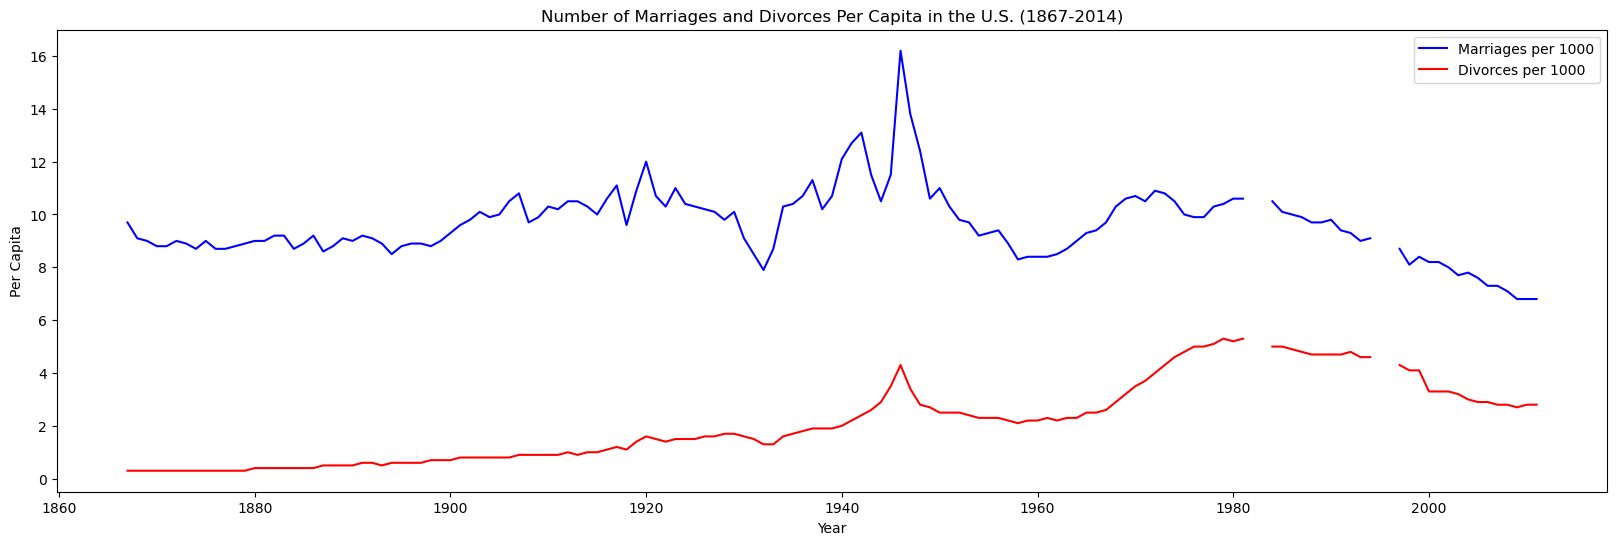

In [180]:

# Step 3. Create a line plot
plt.figure(figsize=(20, 6))
plt.plot(df['Year'], df['Marriages_per_1000'], label='Marriages per 1000', color='blue')
plt.plot(df['Year'], df['Divorces_per_1000'], label='Divorces per 1000', color='red')
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Number of Marriages and Divorces Per Capita in the U.S. (1867-2014)')
plt.legend()
plt.show()

Question 7: # Create a vertical bar chart comparing the number of
marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!

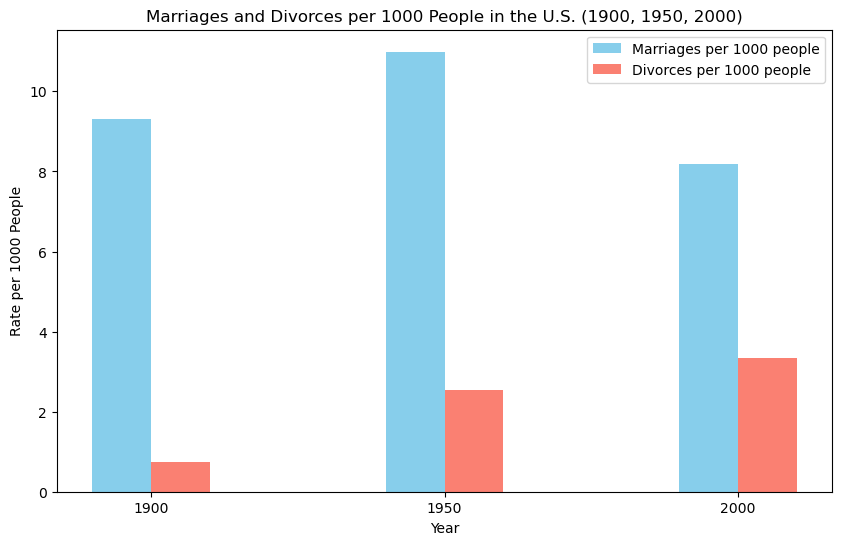

In [201]:
# Filter data for the specified years
selected_years_custom = [1900, 1950, 2000]
selected_data_custom = df[df['Year'].isin(selected_years_custom)].copy()

# Calculate marriages and divorces per capita 
selected_data_custom['Marriages_Per_1000'] = selected_data_custom['Marriages'] / selected_data_custom['Population'] * 1000
selected_data_custom['Divorces_Per_1000'] = selected_data_custom['Divorces'] / selected_data_custom['Population'] * 1000

bar_width_custom = 10
plt.figure(figsize=(10, 6))

marriages_positions_custom = selected_data_custom['Year'] - bar_width_custom / 2
divorces_positions_custom = selected_data_custom['Year'] + bar_width_custom / 2
plt.bar(marriages_positions_custom, selected_data_custom['Marriages_Per_1000'], width=bar_width_custom, label='Marriages per 1000 people', color='skyblue')
plt.bar(divorces_positions_custom, selected_data_custom['Divorces_Per_1000'], width=bar_width_custom, label='Divorces per 1000 people', color='salmon')

# Set plot details
plt.title('Marriages and Divorces per 1000 People in the U.S. (1900, 1950, 2000)')
plt.xlabel('Year')
plt.ylabel('Rate per 1000 People')
plt.legend()
plt.xticks(selected_data_custom['Year'])
plt.show()


Question 8 : # Create a horizontal bar chart that compares the deadliest
 actors in Hollywood. Sort the actors by their kill count and label
each bar with the corresponding actor's name. Don't forget to label your axes!

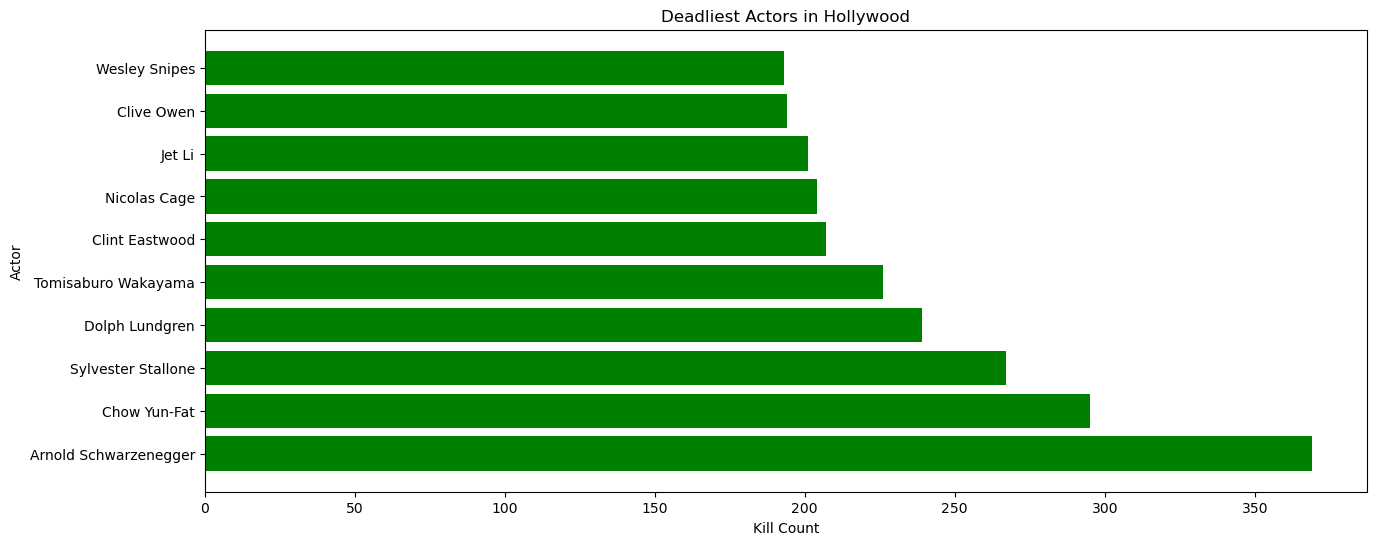

In [188]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file
actor_data = pd.read_csv('actor_kill_counts.csv')

# Display the first few rows of the dataframe
actor_data.head()

# Sort the dataframe by 'Count' column in descending order
actor_data.sort_values(['Count'], inplace=True, ascending=False)

# Plotting
plt.figure(figsize=(15, 6))
plt.barh(actor_data['Actor'], actor_data['Count'],color='green')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.show()


Question 9- # Create a pie chart showing the fraction of all Roman Emperors that were
assassinated. 
Make sure that the pie chart is an even circle, labels
 the categories, and shows the percentage breakdown of the categories.

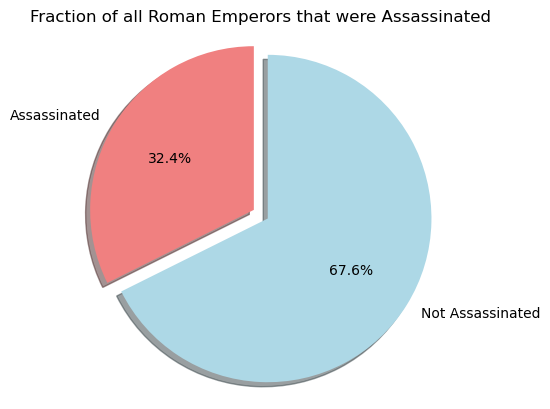

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

emperor_data = pd.read_csv('roman-emperor-reigns.csv')
assassinated_emperors = emperor_data[emperor_data['Cause_of_Death'] == 'Assassinated']

num_assassinated = len(assassinated_emperors)
num_not_assassinated = len(emperor_data) - num_assassinated
fraction_assassinated = num_assassinated / len(emperor_data)

labels = ['Assassinated', 'Not Assassinated']
sizes = [fraction_assassinated, 1 - fraction_assassinated]
explode = (0.1, 0)

colors = ['lightcoral', 'lightblue']

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
ax.axis('equal')
ax.set_title('Fraction of all Roman Emperors that were Assassinated')

plt.show()


QUESTION 10- 

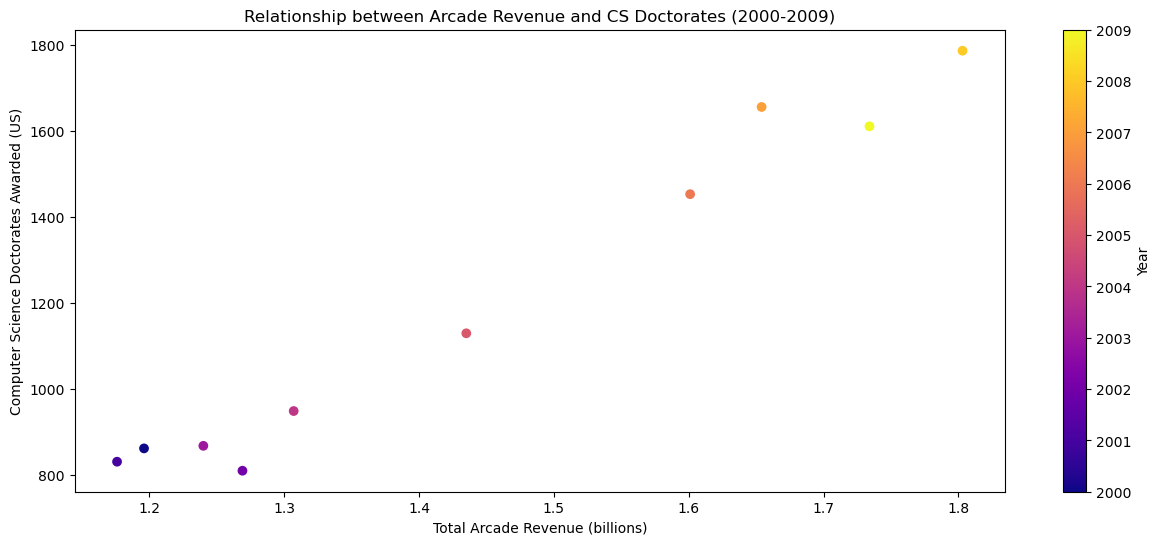

In [198]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the file
arcade_data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
plt.figure(figsize=(15, 6))
scatter_plot = plt.scatter(arcade_data['Total Arcade Revenue (billions)'], arcade_data['Computer Science Doctorates Awarded (US)'], c=arcade_data['Year'], cmap='plasma')

# Add labels and title
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and CS Doctorates (2000-2009)')

# Add a colorbar to show the mapping of years
plt.colorbar(scatter_plot, label='Year')
plt.show()
